# Satelitengeodäsie - Übung 2

## Xeno Meienberg

### Aufgabe 1 - VLBI Kreuzkorrelationsfunktion

Die aufgezeichneten Signale a und b sollen kreuzkorreliert werden. In verschiedenen Zeitreihen 1, 2, 3 werden die Signale mit zufälligen Rauschen überlagert.

Für Aufgabe 1 werden beide Signale a und b via die Funktion in der Numpy Library korreliert. Mathematisch wird dies folgenderweise beschrieben:

$$ R(\tau) = f(\tau) \otimes g(\tau) = \int_{-\infty}^{\infty} f(t)^{*} g(t + \tau) dt$$ 

wobei $R$ die Kreuzkorrelationsfunktion abhängig von der Verzögerung $\tau$ über die gesamte Zeitspanne gerechnet wird, an denen ein Signal vorhanden ist. 


In [59]:
# install packages

%matplotlib inline
import numpy as np
from numpy import sin, cos, tan
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd

a_1 and b_1 are two different signals
a_2 and b_2 are two different signals
a_3 and b_3 are two different signals
a_1 is as long as b_1
a_2 is as long as b_2
a_3 is as long as b_3


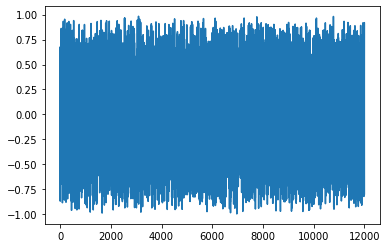

In [60]:
# load data of signals

df = pd.read_csv('Data/Signalsasc.sec', sep='\t') #read in data into pandas dataframe


data = df.to_numpy() #convert pandas dataframe into numpy

a_1 = data[:,0]
a_2 = data[:,1]
a_3 = data[:,2]
b_1 = data[:,3]
b_2 = data[:,4]
b_3 = data[:,5]

plt.plot(a_1)

# Check if each timeseries of a and b is identical

if np.array_equal(a_1,b_1, equal_nan=True):
    print('a_1 and b_1 are the same')

else: 
    print('a_1 and b_1 are two different signals')

if np.array_equal(a_2,b_2, equal_nan = True):
    print('a_2 and b_2 are the same')

else: 
    print('a_2 and b_2 are two different signals') 

if np.array_equal(a_3,b_3, equal_nan=True):
    print('a_3 and b_3 are the same')

else: 
    print('a_3 and b_3 are two different signals')     

# Check if each timeseries is long as the other to which it is compared to

if len(a_1) == len(b_1):
    print('a_1 is as long as b_1')
    len_1 = len(a_1) 

else:
    print('a_1 is not as long as b_2') # The time delay has to be computed differently


if len(a_2) == len(b_2):
    print('a_2 is as long as b_2')
    len_2 = len(a_2)

else: 
    print('a_2 is not as long as b_2') # Same as above

if len(a_3) == len(b_3):
    print('a_3 is as long as b_3')
    len_3 = len(a_3)

else:
    print('a_3 is not as long as b_3') # dito     




Die Signale sind stark vom Rauschen geprägt, wie der obige Plot schön darstellt. Zudem wurde zuvor gemessen, ob alle Signale, welche innerhalb einer Zeitreihe verglichen werden, gleich lang sind. Zudem wird gebprüft, ob die jeweiligen Signale identisch sind.

In [61]:
# Correlate two signals via numpy library

correlation_1 = np.correlate(a_1,b_1,mode='full')
correlation_2 = np.correlate(a_2,b_2,mode='full')
correlation_3 = np.correlate(a_3,b_3,mode='full')

# Length of each signal and length of correlation to double check

print('Length of R is equals 2N-1 in time series 1: ',(2*len_1-1 == len(correlation_1)))
print('Length of R is equals 2N-1 in time series 2: ', (2*len_2-1 == len(correlation_2)))
print('Length of R is equals 2N-1 in time series 3: ', (2*len_3-1 == len(correlation_3)))

#Max and Arg Max

max_1 = max(correlation_1)
max_index_1 = np.argmax(correlation_1)
max_2 = np.max(correlation_2)
max_index_2 = np.argmax(correlation_2)
max_3 = np.max(correlation_3)
max_index_3 = np.argmax(correlation_3)

#print(max_a)
#print(max_index_a)
#print(max_b)
#print(max_index_b)
#print(max_c)
#print(max_index_c)

#Delay for a, b and c - since both signals are of same length, the rule -N + n = tau 

delay_1 = max_index_1 - len_1
delay_2 = max_index_2 - len_2 
delay_3 = max_index_3 - len_3

print('Delay Signal 1:',delay_1)
print('Delay Signal 2:',delay_2)
print('Delay Signal 3:',delay_3)

Length of R is equals 2N-1 in time series 1:  True
Length of R is equals 2N-1 in time series 2:  True
Length of R is equals 2N-1 in time series 3:  True
Delay Signal 1: -3001
Delay Signal 2: -3001
Delay Signal 3: -2610


Gemäss der Theorie wird durch das n-te Element, welches von R das Argument für den Maximalwert für R abruft, bestimmen was die Zeitverzögerung ist. Dies ist dadurch rückzuführen, dass zwei identische Signale die Länge $N$ eine Gesamtlänge von $R = 2N-1$ hervorbringt, also:

$$ \tau = -N + n$$ 

gilt. Da die verglichenen Zeitreihen nicht identisch sind, dann tritt der Fall von Zeitverzögerung 0 nicht ein, ergo nicht das Maximum beim $N$-ten Element von $R$. Die Zeitschritte, welche ermittelt werden, sind oben angezeigt. Die Zeitdifferenzen (in Schritten der Anzahl Elemente zwischen den Messungen) lauten:

$$ \tau_1 = -3001 $$
$$ \tau_2 = -3001 $$
$$ \tau_3 = -2610 $$

Im zweiten Aufgabenteil der Aufgabe 2 wird gefragt, welche Faktoren die Ermittlung der Zeitdifferenz beinflussen. Durch den Plot aller Signale wird folgendes offensichtlich:

Die Signale der Zeitsreihen erhöhen sich stufenartig von Maxima von 1 aufsteigend nach 3. Dies kommt von der Überlagerung zufälligen Rauschens. Somit wird das Urpsrungssignal stark bei Zeitreihe 3 gedeckt, sodass eine viel schlechtere Korrelation ermittelt werden kann im Vergleich zur Korrelation von Zeitserien 1 beider Signale a und b. 

Zudem könnte man die Hypothese wagen, dass je nachdem die Frequenz, mit der die Signale abgetastet werden je nachdem das Resultat beinflussen können. Da der Peak von der Zeitserie 3 sehr klein ist im Vergleich zum Rest des Signals, könnte durch eine höhere Frequenz mehr Zeitpunkte abgegriffen werden und so die Korrelation genauer werden könnte.

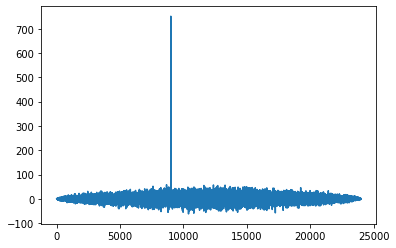

In [62]:
# Plot signals and Correlation

plt.plot(correlation_1)

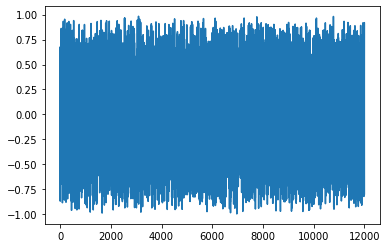

In [63]:
plt.plot(a_1)

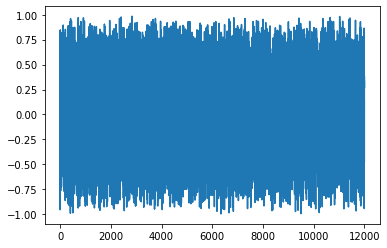

In [64]:
plt.plot(b_1)

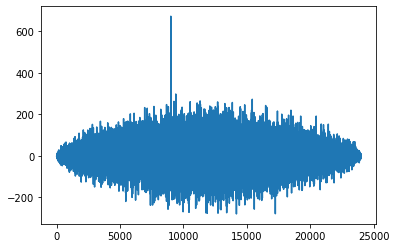

In [65]:
plt.plot(correlation_2)

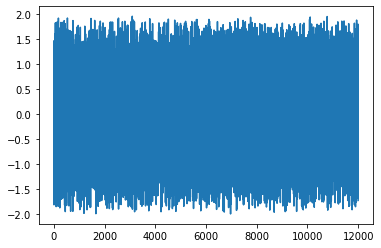

In [66]:
plt.plot(a_2)

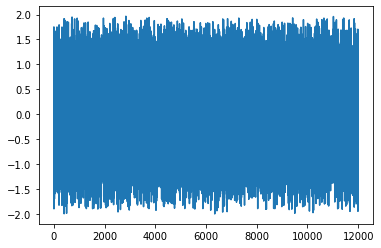

In [67]:
plt.plot(b_2)

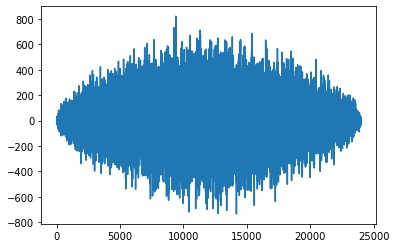

In [68]:
plt.plot(correlation_3)

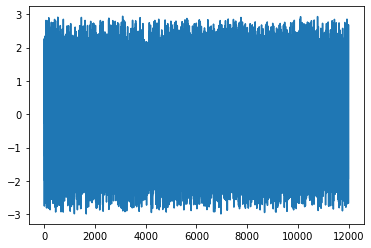

In [69]:
plt.plot(a_3)

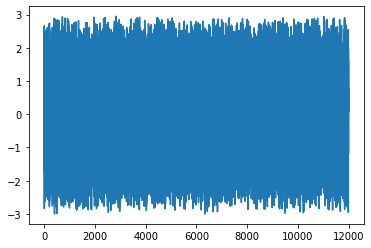

In [70]:
plt.plot(b_3)

### Aufgabe 2 - SLR: Energy Balance

Unten stehend sind alle gegebenen Parameter gegeben, jeweils in der korrekten Einheit.

In [71]:
# Initialize Parameters

L = 6000 * 10**3 #m
d_R = 3.8 * 10**(-2) #m
d_T = 75 * 10**(-2) #m
Theta_S = 25 * 10**(-6) #rad
Theta_R = 34 * 10**(-6) #rad
e_S = 0.2 #J
e_m = 384 * 1000* 1000 #m

#### Teil 1 - LAGEOS-Satelit und Teleskop

Für die Berechnung der empfangenen Energie nach der Reflektion am LAGEOS Sateliten wird jeweils der Durchmesser des Lichtschirms (Strahlungsdivergenz) berechnet, welcher zum Reflektor $d_{\Theta_{s}}$ sowie zurück zum Teleskop $d_{\Theta_{r}}$ kommt. Die angewandten Beziehen lauten:

$$ E_R = \frac{A_R}{A_{\Theta_S}} E_S = \frac{d_R^2}{d_{\Theta_s}^2} E_S $$
$$ E_T = \frac{A_T}{A_{\Theta_R}} E_R = \frac{A_T \cdot A_R}{A_{\Theta_R}\cdot A_{\Theta_S}} E_S = \frac{d_T^2 \cdot d_R^2}{d_{\Theta_R}^2 \cdot d_{\Theta_S}^2} E_S$$

In [72]:
# Calculate the diameters of sent laser (s) and reflector (r)

d_Theta_s = 2*L*tan(Theta_S/2)
d_Theta_r = 2*L*tan(Theta_R/2)

e_R = ((d_R/2)**2) / ((d_Theta_s/2)**2) * e_S
e_T = ((d_T/2)**2*(d_R/2)**2)/((d_Theta_r/2)**2*(d_Theta_s/2)) * e_S

print('Energie bei Reflektor am LAGEOS-Sateliten: ',e_R,'J')
print('Energie nach Rückkehr zum Teleskop:',e_T,'J')

perc_e_R = e_R / e_S * 100
perc_e_T = e_T / e_S * 100

print('Prozentualer Anteil von E_R vom Ursprungssignal E_S: ',perc_e_R)
print('Prozentualer Anteil von E_T vom Ursprungssignal E_S: ',perc_e_T)



Energie bei Reflektor am LAGEOS-Sateliten:  1.2835555554218523e-08 J
Energie nach Rückkehr zum Teleskop: 1.301182237282459e-11 J
Prozentualer Anteil von E_R vom Ursprungssignal E_S:  6.417777777109261e-06
Prozentualer Anteil von E_T vom Ursprungssignal E_S:  6.505911186412294e-09


Es folgen die Resultate:

$E_{R_{LAGEOS}} = 1.284 \cdot 10^{-8}~J$ und $E_{T_{LAGEOS}} = 1.301 \cdot 10^{-11}~J$

Die Energie nimmt von den ursprünglich gesendeten Signalstärke von $E_S = 0.2~J$ zum Sateliten markant ab, nämlich um den Faktor $10^{-7}$ ab. Jedoch beim zurücksenden zur Erde jeweils noch um den Faktor $10^{-3}$ relativ vom Sateliten wieder ab.

Somit könnte man z.B. bei der Entwicklung von Messinstrumenten diese Abfälle mitberücksichtigen und die Instrumente für erwartete Signalstärken trimmen.


#### Teilaufgabe 2 - Reflektor auf Mond

In [73]:
d_Theta_s_em = 2*e_m*tan(Theta_S/2)
d_Theta_r_em = 2*e_m*tan(Theta_R/2)

e_R_em = ((d_R/2)**2) / ((d_Theta_s_em/2)**2) * e_S
e_T_em = ((d_T/2)**2*(d_R/2)**2)/((d_Theta_r_em/2)**2*(d_Theta_s_em/2)) * e_S

print('Energie am Reflektor auf dem Mond: ',e_R_em,'J')
print('Energie nach Rückkehr zum Teleskop: ',e_T_em,'J')

Energie am Reflektor auf dem Mond:  3.1336805552291316e-12 J
Energie nach Rückkehr zum Teleskop:  4.963616322641216e-17 J


Nach dem gleichen Schema wie zuvor, jedoch mit einer mit einer neuen Strahlendivergenz (durch die neue Distanz, nämlich diejenige zum Mond) lauten die Resultate:

$E_{R_{Mond}} = 3.134 \cdot 10^{-12}~J$ und $E_{T_{Mond}} = 4.964 \cdot 10^{-17}~J$

Durch die längere Distanz nimmt das Signal noch stärker ab. 

